In [1]:
import sklearn.datasets
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

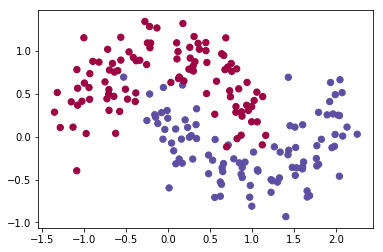

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200,noise=0.2)
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

In [3]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__() 
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,2)

    def forward(self,x):
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        return x
                
    def predict(self,x):
        pred = F.softmax(self.forward(x), dim=1)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [ ]:
#build model        
model = Net()
#crossentropy loss
criterion = nn.CrossEntropyLoss()
#Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#Number of epochs
epochs = 50000
#List to store losses
losses = []
for i in range(epochs):
    if i%10000==0:
        print(i)
    #Precit the output for Given input
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()

0
10000
20000
30000
40000


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))

RuntimeError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [7]:
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

In [8]:
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


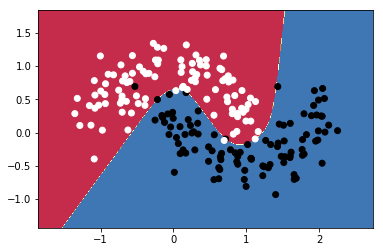

In [9]:
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())